In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

**El Dataset seleccionado posee datos de automóviles usados, proporcionando información sobre como se venden, a que precio se venden y los todos los detalles de su estado.
El dataset cuenta con la siguiente información:**

- dateCrawled - Fecha en que se rastreó el auto. 
- name - Nombre del auto. 
- seller - Tipo de vendedor (particular o concesionario). 
- offerType - Tipo de oferta. 
- price - Precio del coche. 
- abtest - Tipo de prueba. 
- vehicleType -	Tipo de vehículo (por ejemplo, SUV, sedán, etc.)
- yearOfRegistration - Año en que se registro el coche.
- gearbox - Tipo de caja de cambios (manual o automática)
- powerPS -	Potencia del coche
- model - Modelo del coche.
- kilometer - Kilómetros
- monthOfRegistration - Mes en que se registro el coche.
- fuelType - Tipo de combustible (p. ej. diésel, gasolina, etc.)
-  brand -	Marca del auto
- notRepairedDamage - Si el auto tiene o no algún daño que no haya sido reparado.
- dateCreated - Fecha en la que se creó / Fabrico el coche.
- nrOfPictures - Número de fotografías del coche.
- postalCode - Código postal
- lastSeen - Fecha en la que se vio el coche por última vez.

**Estos factores son recursos para comenzar a explorar los factores que afectan los precios de los automóviles usados y descubrir cómo los diferentes aspectos de un vehículo determinan el precio de los autos de segunda mano.**

**Carga de DataSet seleccionado.**

In [3]:
url = 'https://raw.githubusercontent.com/SebastianFurquet/Datasets-Furquet---Seleccionados/main/1_car_pricing.csv'
df = pd.read_csv(url, sep=',')
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Conocer cantidad de filas y columnas totales.**

In [4]:
df.shape

(371528, 21)

**Conocer, columnas, tipos de datos y si hay datos nulos.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

**Como se observa que en algunas de las columnas hay datos nulos se procede a realizar un recuento de dichos datos por columna.**

In [6]:
print(df.isnull().sum())

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


### --  Aca me surje la primer duda, como se si conviene eliminar los datos nulos, o reemplazarlos por la Media, Mediana o Moda. ?? --

**Por un simplicidad de codigos se opta por su eliminacion.**

In [7]:
df.dropna (inplace=True)

**Miro cuantos datos tengo ahora.**

In [8]:
df.shape

(260956, 21)

**Chequeo**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                260956 non-null  int64 
 1   dateCrawled          260956 non-null  object
 2   name                 260956 non-null  object
 3   seller               260956 non-null  object
 4   offerType            260956 non-null  object
 5   price                260956 non-null  int64 
 6   abtest               260956 non-null  object
 7   vehicleType          260956 non-null  object
 8   yearOfRegistration   260956 non-null  int64 
 9   gearbox              260956 non-null  object
 10  powerPS              260956 non-null  int64 
 11  model                260956 non-null  object
 12  kilometer            260956 non-null  int64 
 13  monthOfRegistration  260956 non-null  int64 
 14  fuelType             260956 non-null  object
 15  brand                260956 non-null  o

In [10]:
print(df.isnull().sum())

index                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


**De esta manera mi DF no contiene datos nulos.**

**Para empezar a realizar los graficos necesito saber que columnas tengo.**

In [11]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

# Graficos con Matplotlib

**Vamos a buscar conocer cuantos vehiculos tengo por marca. 
Para lo cual hare un recuento por Marca ( Brand )**

In [21]:
recuento_brand = df['brand'].value_counts()
print (recuento_brand)

brand
volkswagen       54194
bmw              30331
mercedes_benz    26906
opel             26390
audi             24772
ford             17447
renault          11672
peugeot           7851
fiat              6365
seat              5017
skoda             4536
mazda             4039
toyota            3703
citroen           3690
nissan            3594
smart             3352
mini              2877
hyundai           2787
volvo             2588
mitsubishi        2075
kia               1970
honda             1946
porsche           1866
alfa_romeo        1704
suzuki            1683
chevrolet         1348
chrysler          1025
dacia              723
land_rover         635
jeep               616
subaru             550
daihatsu           520
jaguar             487
saab               421
daewoo             337
lancia             320
rover              262
trabant            211
lada               146
Name: count, dtype: int64


**realizo un grafico de linea**

C:\Users\sebas\AppData\Local\Temp\ipykernel_12844\3365275514.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(recuento_brand.index, rotation=90)


Text(0, 0.5, 'Cantidad de Autos')

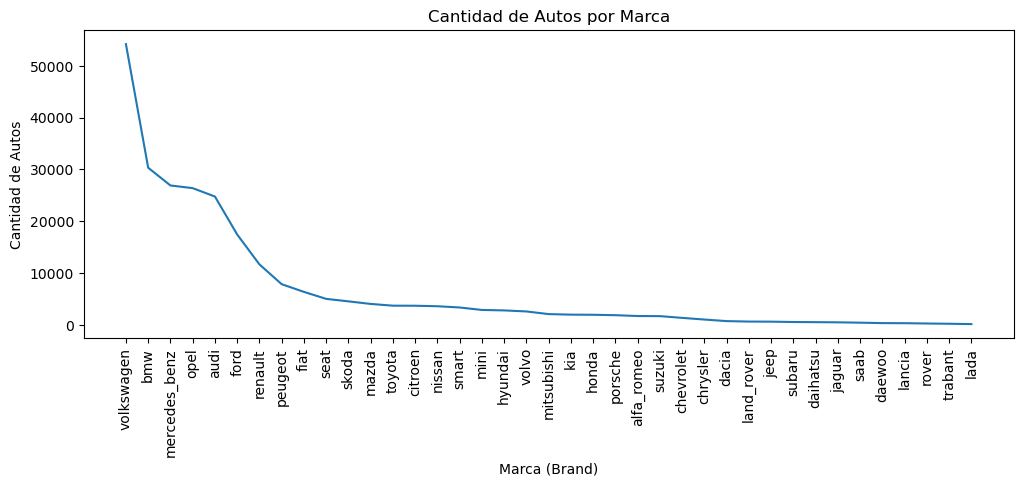

In [103]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(recuento_brand.index, recuento_brand.values)
ax.set_xticklabels(recuento_brand.index, rotation=90)
ax.set_title('Cantidad de Autos por Marca')
ax.set_xlabel('Marca (Brand)')
ax.set_ylabel('Cantidad de Autos')

A simple vista se puede observar que la mayor concentracion de vehiculos se da en las marcas Volkswagen, BMW, Mercedes_Benz, Opel, Audi.

**Cuantos tipos diferentes de cajas de cambio tenemos y su representacion.**

In [12]:
tipos_gearbox = df['gearbox'].value_counts()
print (tipos_gearbox)

gearbox
manuell      200059
automatik     60897
Name: count, dtype: int64


**Realizo un grafico de barras**

Text(0, 0.5, 'cantidades')

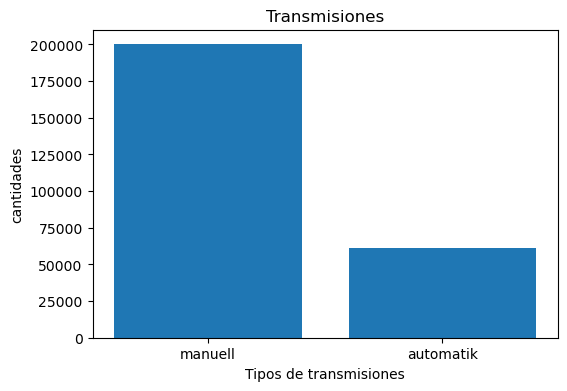

In [13]:
fig1, ax = plt.subplots(figsize = (6,4))
ax.bar(tipos_gearbox.index, tipos_gearbox)
ax.set_title('Transmisiones')
ax.set_xlabel('Tipos de transmisiones')
ax.set_ylabel('cantidades')

**A simple vista en base al grafico, podriamos inferir que hay mas vehiculos manuales que automaticos.**

**Realizo un grafico de torta**

Text(0.5, 1.0, 'Distribución de tipos de caja de cambios')

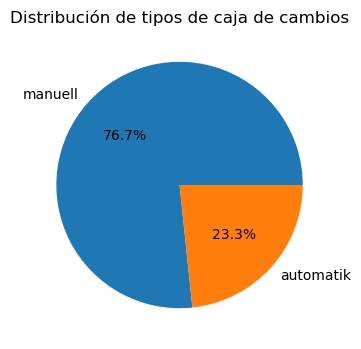

In [15]:
fig2, ax = plt.subplots(figsize=(6, 4))
ax.pie(tipos_gearbox, labels=tipos_gearbox.index, autopct='%1.1f%%')
ax.set_title('Distribución de tipos de caja de cambios')

**Ahora se busca conocer que relacion hay entre el precio y el Año.
Para lo cual usaremos un grafico de dispersion.**

Text(0, 0.5, 'Precio')

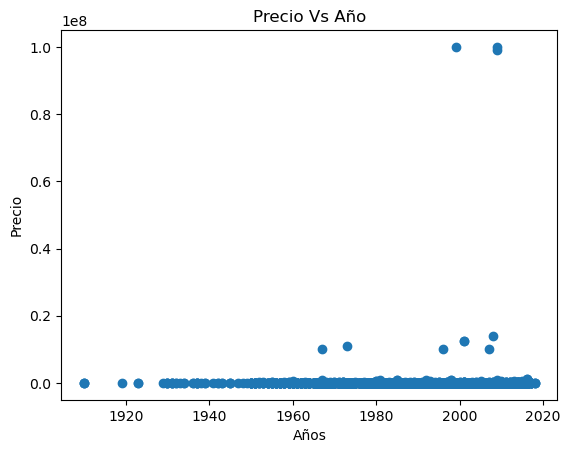

In [106]:
fig3, ax = plt.subplots()
ax.scatter(x=df['yearOfRegistration'], y=df['price'])
ax.set_title('Precio Vs Año')
ax.set_xlabel('Años')
ax.set_ylabel('Precio')

No me queda muy clara la interpretacion del grafico, pero entenderia que la mayor correlacion de datos se da entre 1940 y 2020 y su valor no supera el 0.2 del  precio

***No se como hacer para que me aparezcan en el eje y los valores correctos del precio***

# Graficos con Seaborn

**Se busca conocer donde esta la mayor concentracion de vehiculos segun su año**

C:\Users\sebas\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-12.805555555555555, 0.5, 'Cantidad')

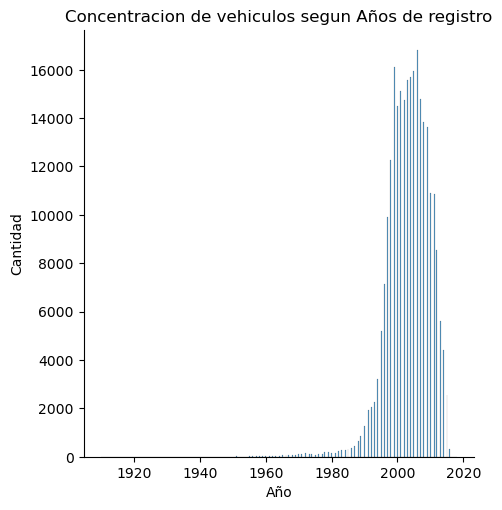

In [116]:
sns.displot(data=df, x='yearOfRegistration')
plt.title('Concentracion de vehiculos segun Años de registro')
plt.xlabel('Año')
plt.ylabel('Cantidad')

**Se hace un grafico de Barra, para analizar .countplot**

<Axes: xlabel='fuelType', ylabel='count'>

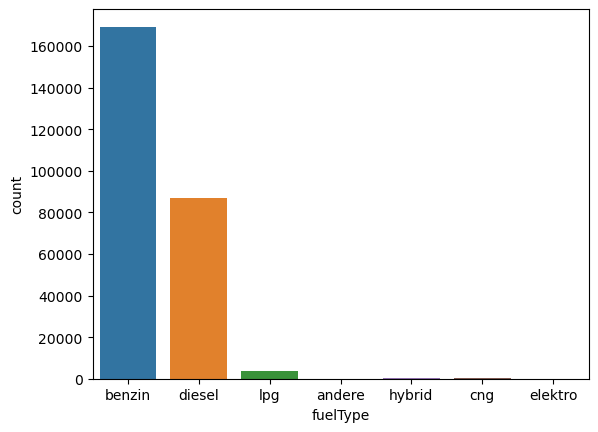

In [121]:
sns.countplot(data=df, x='fuelType')

**Si lo tendria que hacer sin .countplot entiendo que deberia hacerlo de la siguiente manera.**

In [122]:
recuento_fuelType = df['fuelType'].value_counts()
recuento_fuelType

fuelType
benzin     169242
diesel      86974
lpg          3937
cng           460
hybrid        213
andere         73
elektro        57
Name: count, dtype: int64

<Axes: xlabel='fuelType'>

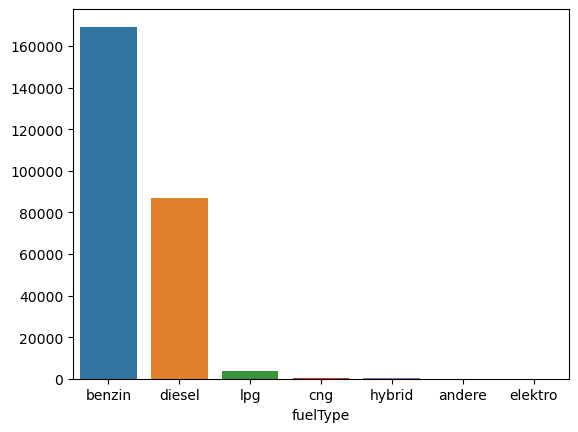

In [123]:
sns.barplot(data=df, x=recuento_fuelType.index, y=recuento_fuelType.values)

**Para ambos casos se puede interpretar que la mayoria de los vehiculos son Nafteros.**

<Axes: xlabel='fuelType', ylabel='price'>

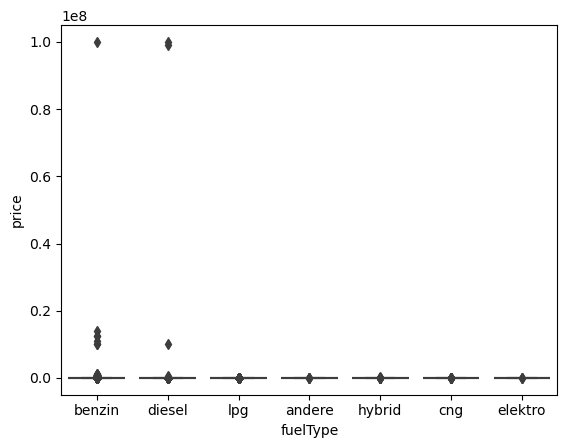

In [127]:
sns.boxplot(data=df, x='fuelType', y='price')

**Este si que no entiendo como interpretarlo.**